# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**Note: This notebook was generated with the assistance of AI. Users should exercise caution when interpreting the code or results.**

This notebook provides an introduction to Dandiset 001354, which contains single cell electrophysiological recordings from mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). The dataset includes whole-cell patch-clamp recordings from neurons transfected with PAGER-Gi receptors, with responses recorded to DCZ application with and without soluble mCherry antigen.

**Dandiset URL:** https://dandiarchive.org/dandiset/001354/0.250312.0036

## What this notebook covers:

1. Accessing dandiset metadata using the DANDI API
2. Exploring the structure of NWB files in the dataset
3. Loading and visualizing intracellular electrophysiology data
4. Examining stimulus protocols and neural responses
5. Understanding the organization of current clamp recordings

## Required packages:

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `pandas`

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## 1. Accessing Dandiset Information

In [2]:
# Connect to DANDI and get dandiset information
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:200]}...")
print(f"Number of subjects: {metadata['assetsSummary']['numberOfSubjects']}")
print(f"Number of cells: {metadata['assetsSummary']['numberOfCells']}")
print(f"Number of files: {metadata['assetsSummary']['numberOfFiles']}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recor...
Number of subjects: 8
Number of cells: 50
Number of files: 50


## 2. Exploring Available NWB Files

In [3]:
# Get information about the NWB files in the dandiset
assets = list(dandiset.get_assets())
print(f"Total number of assets: {len(assets)}")
print("\nFirst few file paths:")
for i, asset in enumerate(assets[:5]):
    print(f"  {i+1}: {asset.path}")

# Look at the structure of subject IDs
subject_ids = set()
for asset in assets:
    parts = asset.path.split('/')
    if len(parts) > 0 and parts[0].startswith('sub-'):
        subject_ids.add(parts[0])

print(f"\nSubject IDs found: {sorted(subject_ids)}")

Total number of assets: 50

First few file paths:
  1: sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
  2: sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
  3: sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
  4: sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
  5: sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb

Subject IDs found: ['sub-PK-109', 'sub-PK-110', 'sub-PK-113', 'sub-PK-114', 'sub-PK-115', 'sub-PK-116', 'sub-PK-119', 'sub-PK-120']


## 3. Loading and Examining a Sample NWB File

Let's load one of the NWB files to understand the data structure.

In [4]:
# Load a sample NWB file (using the first available file)
sample_asset = assets[0]
print(f"Loading file: {sample_asset.path}")

# Get the download URL and open the file remotely
url = sample_asset.download_url
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject species: {nwb.subject.species}")

Loading file: sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 18:07:19-07:00
Subject ID: PK-109
Subject sex: F
Subject species: Mus musculus


## 4. Exploring the Data Structure

Let's examine the organization of the electrophysiological data.

In [5]:
# Examine the acquisition data (responses)
print("Acquisition data (neural responses):")
print(f"Number of acquisition series: {len(nwb.acquisition)}")

# Look at the first few acquisition series
acq_keys = list(nwb.acquisition.keys())[:5]
for key in acq_keys:
    series = nwb.acquisition[key]
    print(f"  {key}: {series.description}, Rate: {series.rate} Hz, Duration: {len(series.data)/series.rate:.1f}s")

# Examine the stimulus data
print(f"\nStimulus data:")
print(f"Number of stimulus series: {len(nwb.stimulus)}")

stim_keys = list(nwb.stimulus.keys())[:5]
for key in stim_keys:
    series = nwb.stimulus[key]
    print(f"  {key}: {series.description}, Rate: {series.rate} Hz")

Acquisition data (neural responses):
Number of acquisition series: 624
  current_clamp-response-01-ch-0: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0s
  current_clamp-response-01-ch-1: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0s
  current_clamp-response-02-ch-0: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0s
  current_clamp-response-02-ch-1: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0s
  current_clamp-response-03-ch-0: Response to: ramp, Rate: 20000.0 Hz, Duration: 5.0s

Stimulus data:
Number of stimulus series: 624
  stimulus-01-ch-0: Stim type: ramp, Rate: 20000.0 Hz
  stimulus-01-ch-1: Stim type: ramp, Rate: 20000.0 Hz
  stimulus-02-ch-0: Stim type: ramp, Rate: 20000.0 Hz
  stimulus-02-ch-1: Stim type: ramp, Rate: 20000.0 Hz
  stimulus-03-ch-0: Stim type: ramp, Rate: 20000.0 Hz


## 5. Examining Cell and Experiment Metadata

In [6]:
# Extract cell and experiment information
if hasattr(nwb, 'lab_meta_data') and 'DandiIcephysMetadata' in nwb.lab_meta_data:
    metadata = nwb.lab_meta_data['DandiIcephysMetadata']
    print(f"Cell ID: {metadata.cell_id}")
    print(f"Slice ID: {metadata.slice_id}")
    print(f"Targeted layer: {metadata.targeted_layer}")

# Look at electrode information
print(f"\nElectrodes:")
for electrode_name, electrode in nwb.icephys_electrodes.items():
    print(f"  {electrode_name}: {electrode.description}")

Cell ID: 2024_07_17_0009
Slice ID: 2024_07_17_0009
Targeted layer: CA1

Electrodes:
  electrode-0: no description
  electrode-1: no description


## 6. Visualizing Sample Current Clamp Data

Let's examine some current clamp recordings to understand the experimental protocol.

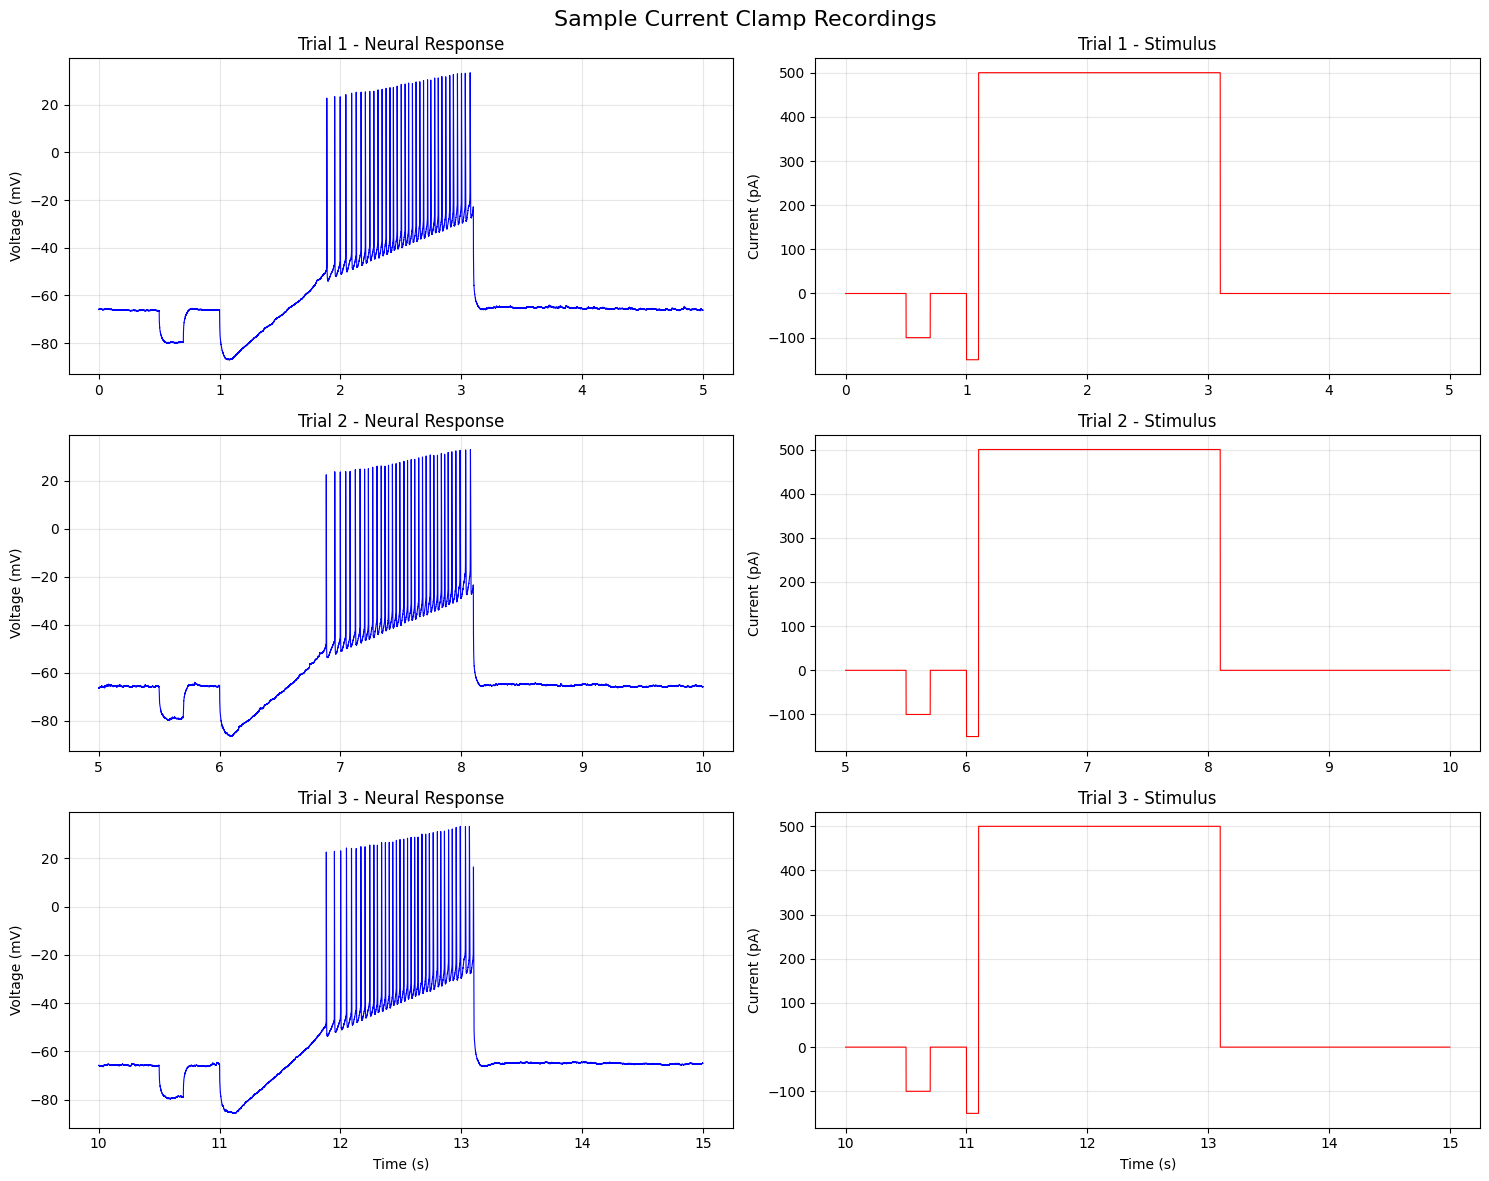

In [7]:
# Select a few current clamp responses and stimuli to visualize
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Sample Current Clamp Recordings', fontsize=16)

# Get response and stimulus data for the first few trials
for i in range(3):
    # Get response data (channel 0)
    response_key = f"current_clamp-response-{i+1:02d}-ch-0"
    stimulus_key = f"stimulus-{i+1:02d}-ch-0"
    
    if response_key in nwb.acquisition and stimulus_key in nwb.stimulus:
        response_series = nwb.acquisition[response_key]
        stimulus_series = nwb.stimulus[stimulus_key]
        
        # Create time vectors
        response_time = np.arange(len(response_series.data)) / response_series.rate + response_series.starting_time
        stimulus_time = np.arange(len(stimulus_series.data)) / stimulus_series.rate + stimulus_series.starting_time
        
        # Convert data to appropriate units
        response_data = response_series.data[:] * response_series.conversion  # Convert to volts
        stimulus_data = stimulus_series.data[:] * stimulus_series.conversion  # Convert to amperes
        
        # Plot response (voltage)
        axes[i, 0].plot(response_time, response_data * 1000, 'b-', linewidth=0.8)  # Convert to mV
        axes[i, 0].set_ylabel('Voltage (mV)')
        axes[i, 0].set_title(f'Trial {i+1} - Neural Response')
        axes[i, 0].grid(True, alpha=0.3)
        
        # Plot stimulus (current)
        axes[i, 1].plot(stimulus_time, stimulus_data * 1e12, 'r-', linewidth=0.8)  # Convert to pA
        axes[i, 1].set_ylabel('Current (pA)')
        axes[i, 1].set_title(f'Trial {i+1} - Stimulus')
        axes[i, 1].grid(True, alpha=0.3)
        
        if i == 2:  # Only add x-label to bottom plots
            axes[i, 0].set_xlabel('Time (s)')
            axes[i, 1].set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

## 7. Analyzing Stimulus Protocols

Let's examine the stimulus patterns used in the experiments.

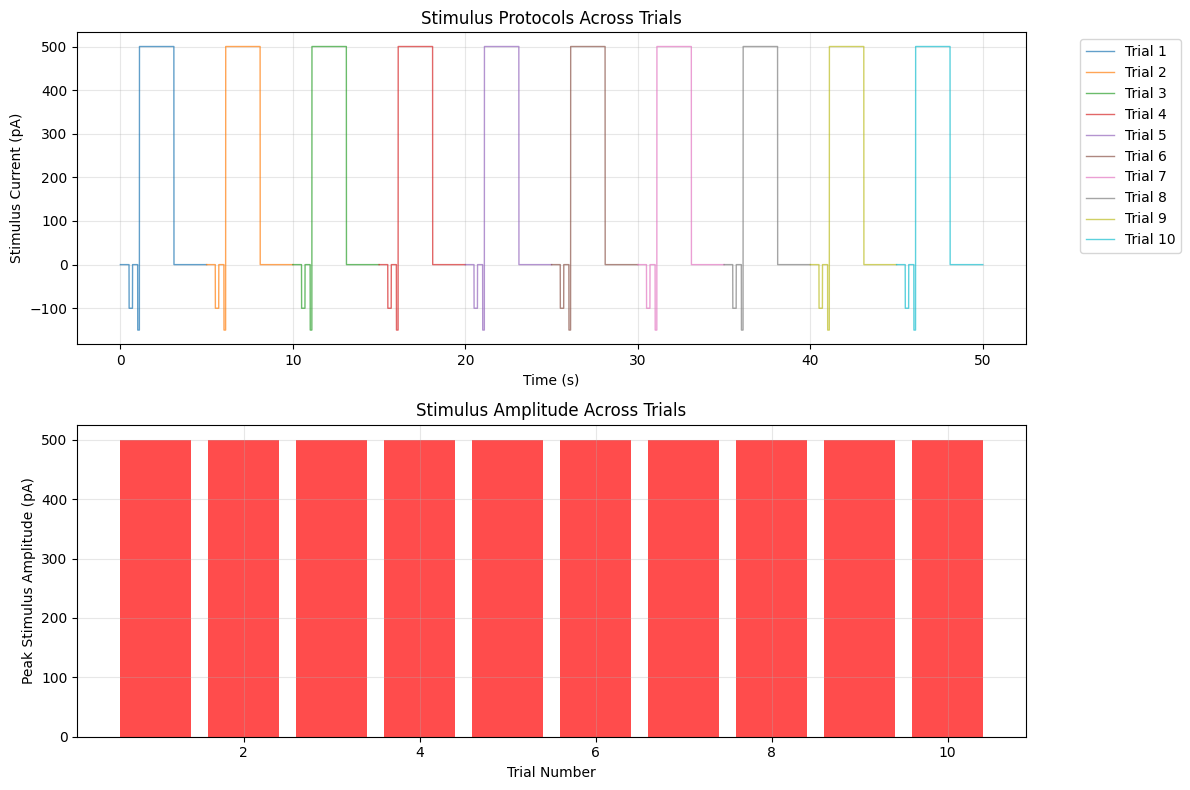

In [8]:
# Analyze the stimulus protocols across multiple trials
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot stimulus waveforms for first 10 trials
stimulus_amplitudes = []
trial_numbers = []

for i in range(min(10, len([k for k in nwb.stimulus.keys() if 'ch-0' in k]))):
    stimulus_key = f"stimulus-{i+1:02d}-ch-0"
    if stimulus_key in nwb.stimulus:
        stimulus_series = nwb.stimulus[stimulus_key]
        stimulus_time = np.arange(len(stimulus_series.data)) / stimulus_series.rate + stimulus_series.starting_time
        stimulus_data = stimulus_series.data[:] * stimulus_series.conversion * 1e12  # Convert to pA
        
        # Plot individual stimulus traces
        ax1.plot(stimulus_time, stimulus_data, alpha=0.7, linewidth=1, label=f'Trial {i+1}')
        
        # Collect peak stimulus amplitudes
        stimulus_amplitudes.append(np.max(np.abs(stimulus_data)))
        trial_numbers.append(i+1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Stimulus Current (pA)')
ax1.set_title('Stimulus Protocols Across Trials')
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot stimulus amplitude progression
ax2.bar(trial_numbers, stimulus_amplitudes, alpha=0.7, color='red')
ax2.set_xlabel('Trial Number')
ax2.set_ylabel('Peak Stimulus Amplitude (pA)')
ax2.set_title('Stimulus Amplitude Across Trials')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Examining Response Characteristics

Let's analyze the neural response characteristics across different stimulus conditions.

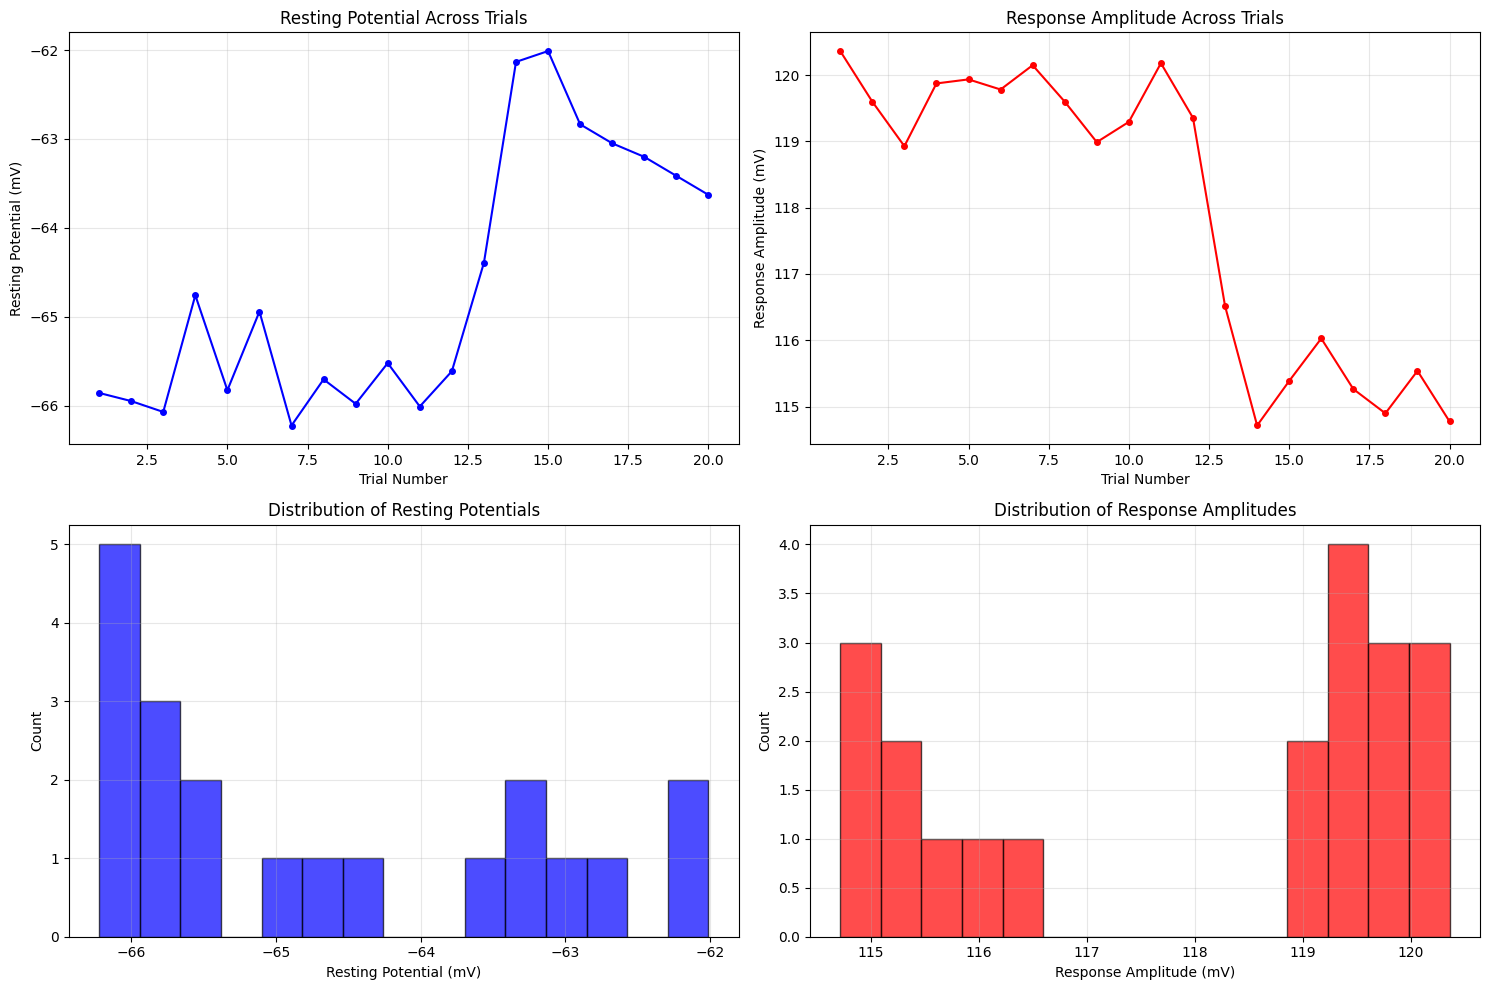

Average resting potential: -64.7 ± 1.4 mV
Average response amplitude: 118.0 ± 2.2 mV


In [9]:
# Analyze response characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Collect response metrics
resting_potentials = []
response_amplitudes = []
trial_nums = []

for i in range(min(20, len([k for k in nwb.acquisition.keys() if 'ch-0' in k]))):
    response_key = f"current_clamp-response-{i+1:02d}-ch-0"
    if response_key in nwb.acquisition:
        response_series = nwb.acquisition[response_key]
        response_data = response_series.data[:] * response_series.conversion * 1000  # Convert to mV
        
        # Calculate metrics
        resting_potential = np.median(response_data[:1000])  # First 1000 points as baseline
        response_amplitude = np.max(response_data) - np.min(response_data)
        
        resting_potentials.append(resting_potential)
        response_amplitudes.append(response_amplitude)
        trial_nums.append(i+1)

# Plot 1: Resting potential across trials
axes[0, 0].plot(trial_nums, resting_potentials, 'bo-', markersize=4)
axes[0, 0].set_xlabel('Trial Number')
axes[0, 0].set_ylabel('Resting Potential (mV)')
axes[0, 0].set_title('Resting Potential Across Trials')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Response amplitude across trials
axes[0, 1].plot(trial_nums, response_amplitudes, 'ro-', markersize=4)
axes[0, 1].set_xlabel('Trial Number')
axes[0, 1].set_ylabel('Response Amplitude (mV)')
axes[0, 1].set_title('Response Amplitude Across Trials')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribution of resting potentials
axes[1, 0].hist(resting_potentials, bins=15, alpha=0.7, color='blue', edgecolor='black')
axes[1, 0].set_xlabel('Resting Potential (mV)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Resting Potentials')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Distribution of response amplitudes
axes[1, 1].hist(response_amplitudes, bins=15, alpha=0.7, color='red', edgecolor='black')
axes[1, 1].set_xlabel('Response Amplitude (mV)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of Response Amplitudes')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average resting potential: {np.mean(resting_potentials):.1f} ± {np.std(resting_potentials):.1f} mV")
print(f"Average response amplitude: {np.mean(response_amplitudes):.1f} ± {np.std(response_amplitudes):.1f} mV")

## 9. Comparing Early vs. Late Responses

Let's examine how neural responses change over the course of the experiment, which may reflect drug effects or PAGER activation.

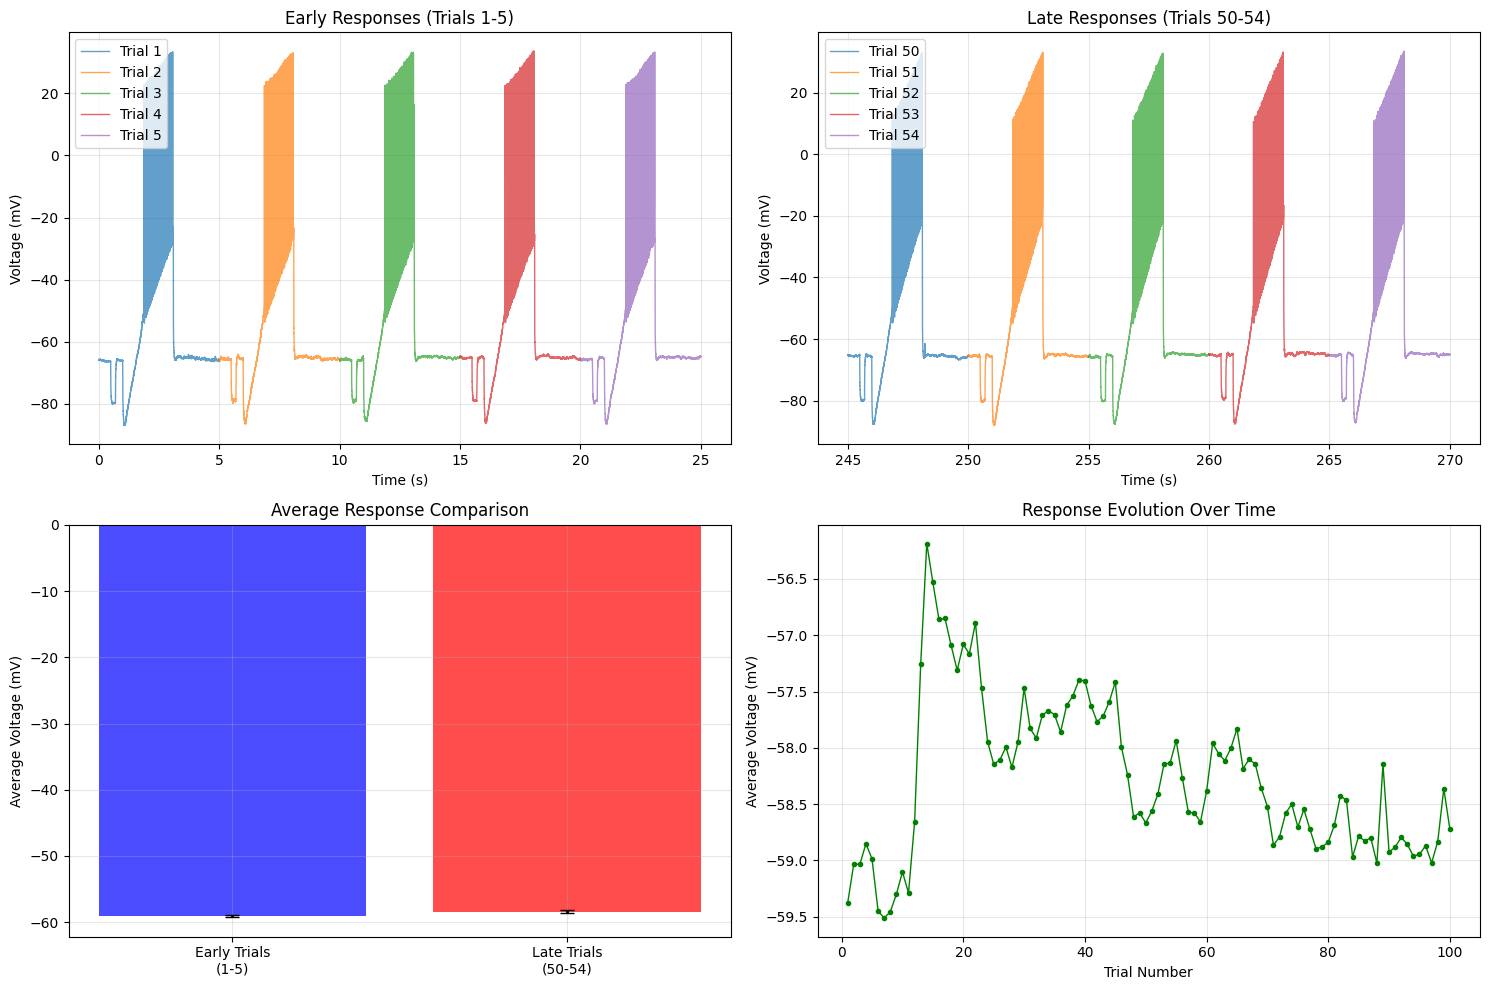

In [10]:
# Compare early vs late responses in the experiment
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Define early and late trials
early_trials = range(1, 6)  # First 5 trials
late_trials = range(50, 55)  # Trials 50-54

# Plot early responses
for i, trial_num in enumerate(early_trials):
    response_key = f"current_clamp-response-{trial_num:02d}-ch-0"
    if response_key in nwb.acquisition:
        response_series = nwb.acquisition[response_key]
        response_time = np.arange(len(response_series.data)) / response_series.rate + response_series.starting_time
        response_data = response_series.data[:] * response_series.conversion * 1000
        
        axes[0, 0].plot(response_time, response_data, alpha=0.7, linewidth=1, label=f'Trial {trial_num}')

axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Voltage (mV)')
axes[0, 0].set_title('Early Responses (Trials 1-5)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Plot late responses
for i, trial_num in enumerate(late_trials):
    response_key = f"current_clamp-response-{trial_num:02d}-ch-0"
    if response_key in nwb.acquisition:
        response_series = nwb.acquisition[response_key]
        response_time = np.arange(len(response_series.data)) / response_series.rate + response_series.starting_time
        response_data = response_series.data[:] * response_series.conversion * 1000
        
        axes[0, 1].plot(response_time, response_data, alpha=0.7, linewidth=1, label=f'Trial {trial_num}')

axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Voltage (mV)')
axes[0, 1].set_title('Late Responses (Trials 50-54)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Calculate and compare average responses
early_avg = []
late_avg = []

for trial_num in early_trials:
    response_key = f"current_clamp-response-{trial_num:02d}-ch-0"
    if response_key in nwb.acquisition:
        response_series = nwb.acquisition[response_key]
        response_data = response_series.data[:] * response_series.conversion * 1000
        early_avg.append(np.mean(response_data))

for trial_num in late_trials:
    response_key = f"current_clamp-response-{trial_num:02d}-ch-0"
    if response_key in nwb.acquisition:
        response_series = nwb.acquisition[response_key]
        response_data = response_series.data[:] * response_series.conversion * 1000
        late_avg.append(np.mean(response_data))

# Bar plot comparison
categories = ['Early Trials\n(1-5)', 'Late Trials\n(50-54)']
means = [np.mean(early_avg), np.mean(late_avg)]
stds = [np.std(early_avg), np.std(late_avg)]

axes[1, 0].bar(categories, means, yerr=stds, alpha=0.7, color=['blue', 'red'], 
               capsize=5, error_kw={'linewidth': 2})
axes[1, 0].set_ylabel('Average Voltage (mV)')
axes[1, 0].set_title('Average Response Comparison')
axes[1, 0].grid(True, alpha=0.3)

# Time course of average response across all trials
trial_averages = []
trial_numbers_all = []

for i in range(1, min(101, len([k for k in nwb.acquisition.keys() if 'ch-0' in k]) + 1)):
    response_key = f"current_clamp-response-{i:02d}-ch-0"
    if response_key in nwb.acquisition:
        response_series = nwb.acquisition[response_key]
        response_data = response_series.data[:] * response_series.conversion * 1000
        trial_averages.append(np.mean(response_data))
        trial_numbers_all.append(i)

axes[1, 1].plot(trial_numbers_all, trial_averages, 'go-', markersize=3, linewidth=1)
axes[1, 1].set_xlabel('Trial Number')
axes[1, 1].set_ylabel('Average Voltage (mV)')
axes[1, 1].set_title('Response Evolution Over Time')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

This notebook has introduced the key components of Dandiset 001354, which contains intracellular electrophysiology recordings from hippocampal CA1 neurons with PAGER-Gi receptors. The dataset provides a rich resource for studying programmable chemogenetic control of neuronal activity.

Key findings from our exploration:
- The dataset contains current clamp recordings with systematic stimulus protocols
- Neural responses show variability across trials, potentially reflecting experimental manipulations
- The data structure follows NWB standards with clear organization of stimuli and responses

This dataset could be used for analyses of chemogenetic receptor function, dose-response relationships, and temporal dynamics of engineered receptor activation in neurons.